In [1]:
from tkinter.tix import COLUMN
from turtle import color
from google.colab import drive
import numpy as np
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas
from shapely.geometry import Point


**PART 1: Importing data from Wikipedia**


Importing first table - List of volcanic eruptions in the 21st century

In [2]:
wikiurl='https://en.wikipedia.org/wiki/List_of_volcanic_eruptions_in_the_21st_century'
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)


200


as the status code = 200, we can download data


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
eruptions_21=soup.find('table',{'class':"wikitable"})
df_21=pd.read_html(str(eruptions_21))
# convert list to dataframe
df_21=pd.DataFrame(df_21[0])
df_21.head()

,VEI,Volcano,Country,Year,Max Plume Height (km),Fatalities,Notes
0,2,Popocatépetl[1],Mexico,2022,NaN,1,One woman was killed and 2 other climbers were...
1,3,Bezymianny[3],Russia,2022,15.0,NaN,"An eruption on May 28, 2022, sent ash to an al..."
2,5,Hunga Tonga–Hunga Ha'apai[5],Tonga,2022,58.0,5,The explosive submarine eruption began on Dece...
3,3,Mount Semeru[10],Indonesia,2021,12.0,57,"An eruption began on December 4, 2021, and eje..."
4,3,Cumbre Vieja[11],"Canary Islands, Spain",2021,NaN,1,Strombolian fissure eruption resulting in one ...


Importing the second table: List of volcanic eruptions 1500–1999

In [4]:
wikiurl='https://en.wikipedia.org/wiki/List_of_volcanic_eruptions_1500%E2%80%931999'
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


status code = 200, we can download data


In [5]:
soup = BeautifulSoup(response.text, 'html.parser')
eruptions_15=soup.find('table',{'class':"wikitable"})

df_15=pd.read_html(str(eruptions_15))
df_15=pd.DataFrame(df_15[0]) # converting list to dataframe
df_15.head()

,VEI,Volcano,Country,Year,Fatalities,Notes
0,3,Soufrière Hills[1],Montserrat,1997,19,A major eruption on 25 June 1997 caused pyrocl...
1,2,Kanlaon[3],Philippines,1996,3,24 mountain climbers hiked the volcano when it...
2,1,Yakedake[5],Japan,1995,4,Four people at a highway construction site wer...
3,2,Mount Merapi[7],Indonesia,1994,64,"A pyroclastic flow on November 22, 1994 killed..."
4,3,Rinjani[9],Indonesia,1994,30,A cold lahar from the summit of Rinjani on Nov...


Concatenating both tables into 1 containing the data from 1500-2022:

In [6]:
print('Length df_21+ df_15:', len(df_21)+len(df_15))
df = pd.concat([df_21, df_15])
print('Lenght of df: ', len(df)) #comparing the length of files before and after concatenating 
df.iloc[220] #checking chosen row


Length df_21+ df_15: 280
Lenght of df:  280


VEI                              4
Volcano                  Hekla[83]
Country                    Iceland
Year                     1766–1768
Max Plume Height (km)          NaN
Fatalities                     NaN
Notes                          NaN
Name: 164, dtype: object

**PART 2: Cleaning data**

Renaming column VEI to Volcanic Explosivity Index:

In [7]:
df = df.rename(columns={'VEI':'Volcanic Explosivity Index'})

Clearing the number in square brackets from column with volcano name:

In [8]:
df['Volcano']=df['Volcano'].replace("[\[\d\]]",'', regex=True)

Removing colum 'Notes' as it is not going to be used

In [9]:
df = df.drop(labels="Notes", axis=1)


In [10]:
df.head()

,Volcanic Explosivity Index,Volcano,Country,Year,Max Plume Height (km),Fatalities
0,2,Popocatépetl,Mexico,2022,NaN,1
1,3,Bezymianny,Russia,2022,15.0,NaN
2,5,Hunga Tonga–Hunga Ha'apai,Tonga,2022,58.0,5
3,3,Mount Semeru,Indonesia,2021,12.0,57
4,3,Cumbre Vieja,"Canary Islands, Spain",2021,NaN,1


In [11]:
df['Year'][20:30]

20            2015
21            2015
22       2014-2015
23       2014-2015
24    2014-ongoing
25            2014
26            2014
27            2014
28       2013-2019
29            2012
Name: Year, dtype: object

After checking the Year column, we see that some eruptions have time ranges or are ongoing. For further analysis I will consider only eruption start dates:

In [12]:
df['Year']=df['Year'].replace('[–-][\w\d]*','', regex=True)
df['Year'][20:30]

20    2015
21    2015
22    2014
23    2014
24    2014
25    2014
26    2014
27    2014
28    2013
29    2012
Name: Year, dtype: object

Editing column with fatalities number:

In [13]:
df['Fatalities'][30:50]

30     4[60]
31       NaN
32    31[63]
33       NaN
34       NaN
35       353
36     3[69]
37       NaN
38       NaN
39       NaN
40       NaN
41     1[80]
42       NaN
43         7
44       NaN
45         1
46         2
47       NaN
48         2
49       NaN
Name: Fatalities, dtype: object

In [14]:
df['Fatalities'] = df['Fatalities'].replace('[\[][\d -]+[\]]','',regex=True) # removing numbers in []
df['Fatalities'] = df['Fatalities'].replace('[–-][\d]+','',regex=True) #removing ranges - assumming lower value
df['Fatalities'] = df['Fatalities'].replace('[+]','',regex=True) #removing + in fatalities number
df['Fatalities'] = df['Fatalities'].replace(',','',regex=True) #removing comma from fatalities numbers

In [15]:
df['Fatalities'][30:50]

30      4
31    NaN
32     31
33    NaN
34    NaN
35    353
36      3
37    NaN
38    NaN
39    NaN
40    NaN
41      1
42    NaN
43      7
44    NaN
45      1
46      2
47    NaN
48      2
49    NaN
Name: Fatalities, dtype: object

Checking the column with countries

In [16]:
df['Country'][80:90]

24                              Russia
25           Washington, United States
26                               Italy
27                           Indonesia
28                           Indonesia
29    Democratic Republic of the Congo
30               Alaska, United States
31                              Russia
32                           Guatemala
33                              Russia
Name: Country, dtype: object

Correcting all countries names, to show only country, without states or regions:

In [17]:
df['Country'] = df['Country'].replace('[\w ]+, ','',regex=True)

In [18]:
df['Country'][80:90]

24                              Russia
25                       United States
26                               Italy
27                           Indonesia
28                           Indonesia
29    Democratic Republic of the Congo
30                       United States
31                              Russia
32                           Guatemala
33                              Russia
Name: Country, dtype: object

Importing another table - list of countries per continent 

In [19]:
drive.mount('/content/drive') #mounting the drive for use and connecting to my drive account

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
continents = pd.read_excel('/content/drive/My Drive/Colab Notebooks/countries.xlsx', index_col=0)
continents.head()

,Continent
Country,
Burundi,Africa
Angola,Africa
Algeria,Africa
Benin,Africa
Comoros,Africa


Merging df with continents table - adding the column with continent to df

In [21]:
df = pd.merge(df, continents, how='left', on=['Country'])

In [22]:
df[df['Continent'].isnull()] # checking all the countires that don't have a continent assigned

,Volcanic Explosivity Index,Volcano,Country,Year,Max Plume Height (km),Fatalities,Continent
203,6,Unknown source,Unknown,1808,NaN,NaN,NaN


Removing rows which don't contain any contry name:

In [23]:
df = df[df['Country'] != 'Unknown']

Removing '?' from the column with Volcanic Explisivity Index:

In [24]:
df['Volcanic Explosivity Index'].replace('?', np.nan, inplace=True)

Checking formats of the data:


In [25]:
df.dtypes

Volcanic Explosivity Index     object
Volcano                        object
Country                        object
Year                           object
Max Plume Height (km)         float64
Fatalities                     object
Continent                      object
dtype: object

Checking how much data is missing:

In [26]:
for col in df.columns:
    itm_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(itm_missing*100)))

Volcanic Explosivity Index - 0%
Volcano - 0%
Country - 0%
Year - 0%
Max Plume Height (km) - 87%
Fatalities - 60%
Continent - 0%


Setting indices to continent, country and volcano name:

In [27]:
df = df.set_index(['Continent','Country','Volcano'])

Sorting by continent and country:

In [28]:
df = df.sort_index()

Stripping columns to plain text:

In [29]:
df = df.rename(mapper=str.strip, axis='columns')

In [30]:
df.head()

Volcanic Explosivity Index  \
Continent Country                          Volcano                                       
Africa    Cape Verde                       Pico do Fogo                              3   
          Democratic Republic of the Congo Mount Nyiragongo                          1   
                                           Mount Nyiragongo                          1   
                                           Mount Nyiragongo                          1   
          Eritrea                          Dubbi                                     3   

                                                             Year  \
Continent Country                          Volcano                  
Africa    Cape Verde                       Pico do Fogo      2014   
          Democratic Republic of the Congo Mount Nyiragongo  2021   
                                           Mount Nyiragongo  2002   
                                           Mount Nyiragongo  1977   
          Eritrea                          Dubbi             1861   

                                                             Max Plume Height (km)  \
Continent Country                          Volcano                                   
Africa    Cape Verde                       Pico do Fogo                        NaN   
          Democratic Republic of the Congo Mount Nyiragongo                    NaN   
                                           Mount Nyiragongo                    NaN   
                                           Mount Nyiragongo                    NaN   
          Eritrea                          Dubbi                               NaN   

                                                            Fatalities  
Continent Country                          Volcano                      
Africa    Cape Verde                       Pico do Fogo            NaN  
          Democratic Republic of the Congo Mount Nyiragongo         32  
                                           Mount Nyiragongo        245  
                                           Mount Nyiragongo         70  
          Eritrea                          Dubbi                   106

**PART 3: Data analysis and answering the questions**

*1. Which eruption was the biggest in terms of VEI, Fatalities and Max Plume Height?*

Eruption with biggest Volcanic Explosivity Index:

Dropping NAN from column 'Volcanic Explosivity Index'

In [31]:
df1 = df.dropna(axis='index', how='any', subset=['Volcanic Explosivity Index']).copy() #creating new dataframe with NANs removed from column 'Fatalities

In [32]:
df1['Volcanic Explosivity Index'] = df1['Volcanic Explosivity Index'].astype(int)

In [33]:
df1.dtypes

Volcanic Explosivity Index      int64
Year                           object
Max Plume Height (km)         float64
Fatalities                     object
dtype: object

In [34]:
VEI = df1.sort_values('Volcanic Explosivity Index', ascending=False)
VEI.head()

Volcanic Explosivity Index  \
Continent                       Country          Volcano                                      
Asia                            Indonesia        Mount Tambora                            7   
Australia and Oceania           Papua New Guinea Long Island                              6   
                                                 Billy Mitchell                           6   
South America and the Caribbean Peru             Huaynaputina                             6   
Asia                            Indonesia        Krakatoa                                 6   

                                                                 Year  \
Continent                       Country          Volcano                
Asia                            Indonesia        Mount Tambora   1815   
Australia and Oceania           Papua New Guinea Long Island     1660   
                                                 Billy Mitchell  1580   
South America and the Caribbean Peru             Huaynaputina    1600   
Asia                            Indonesia        Krakatoa        1883   

                                                                 Max Plume Height (km)  \
Continent                       Country          Volcano                                 
Asia                            Indonesia        Mount Tambora                     NaN   
Australia and Oceania           Papua New Guinea Long Island                       NaN   
                                                 Billy Mitchell                    NaN   
South America and the Caribbean Peru             Huaynaputina                      NaN   
Asia                            Indonesia        Krakatoa                          NaN   

                                                                Fatalities  
Continent                       Country          Volcano                    
Asia                            Indonesia        Mount Tambora    71000100  
Australia and Oceania           Papua New Guinea Long Island           NaN  
                                                 Billy Mitchell        NaN  
South America and the Caribbean Peru             Huaynaputina         1500  
Asia                            Indonesia        Krakatoa            36417

Eruption that caused the larger number of Fatalites:

In [35]:
df2 = df.dropna(axis='index', how='any', subset=['Fatalities']).copy() #creating new dataframe with NANs removed from column 'Fatalities

In [36]:
df2['Fatalities'] = (df2['Fatalities']).astype(int)

In [37]:
Fatalities = df2.sort_values('Fatalities', ascending=False)
Fatalities.head()

Volcanic Explosivity Index  Year  \
Continent Country     Volcano                                          
Asia      Indonesia   Mount Tambora                          7  1815   
          Japan       Mount Asama                            4  1783   
                      Oshima–Ōshima                          4  1741   
          Philippines Hibok-Hibok                            3  1951   
          Indonesia   Krakatoa                               6  1883   

                                     Max Plume Height (km)  Fatalities  
Continent Country     Volcano                                           
Asia      Indonesia   Mount Tambora                    NaN    71000100  
          Japan       Mount Asama                      NaN     1500624  
                      Oshima–Ōshima                    NaN     1467033  
          Philippines Hibok-Hibok                      NaN      500000  
          Indonesia   Krakatoa                         NaN       36417

Eruption with the highest registered Plume Height:


In [38]:
Plume = df.sort_values('Max Plume Height (km)', ascending=False)
Plume.head()

,,,Volcanic Explosivity Index,Year,Max Plume Height (km),Fatalities
Continent,Country,Volcano,,,,
Australia and Oceania,Tonga,Hunga Tonga–Hunga Ha'apai,5,2022,58.0,5
South America and the Caribbean,Chile,Chaitén,4,2008,30.0,1
Asia,Indonesia,Kelud,4,2014,26.0,7
Australia and Oceania,Papua New Guinea,Manam,4,2004,24.0,NaN
Asia,Russia,Sarychev Peak,4,2009,21.0,NaN


*2. Quantity of eruptions, fatalities and VEI per country and per continent*

Which continent had the larger number of volcanic eruptions?

In [39]:
max_expl1 = df.groupby(['Continent']).count()['Year'].sort_values(ascending=False)
max_expl1

Continent
Asia                               123
South America and the Caribbean     60
Europe                              43
Australia and Oceania               27
North America                       20
Africa                               6
Name: Year, dtype: int64

Which country had the larger number of volcanic eruptions?

In [40]:
max_expl2 = df.groupby(['Country']).count()['Year'].sort_values(ascending=False)
max_expl2

Country
Indonesia                           54
Japan                               29
Iceland                             26
Russia                              24
United States                       19
Papua New Guinea                    16
Philippines                         15
Chile                               12
Ecuador                             12
Mexico                              11
Italy                               11
Guatemala                           10
New Zealand                          6
Colombia                             6
Tonga                                3
Saint Vincent and the Grenadines     3
Democratic Republic of the Congo     3
Spain                                2
Eritrea                              2
Vanuatu                              2
Portugal                             2
Peru                                 2
Canada                               1
Nicaragua                            1
Montserrat                           1
Cape Verde       

Which continent had most fatalities based on registered data?

In [41]:
max_fat1 = df2.groupby(['Continent']).sum()['Fatalities'].sort_values(ascending=False)
max_fat1

Continent
Asia                               74558081
Europe                                47398
South America and the Caribbean       36775
Australia and Oceania                  4090
North America                          2457
Africa                                  484
Name: Fatalities, dtype: int64

Which country had most fatalities based on registered data?

In [42]:
max_fat2 = df2.groupby(['Country']).sum()['Fatalities'].sort_values(ascending=False)
max_fat2

Country
Indonesia                           71069942
Japan                                2984261
Philippines                           503856
France                                 33000
Colombia                               24645
Iceland                                10001
Guatemala                               6449
Italy                                   4326
Papua New Guinea                        3954
Canada                                  2000
Mexico                                  1904
Saint Vincent and the Grenadines        1756
Peru                                    1500
United States                            457
Democratic Republic of the Congo         347
Ecuador                                  344
Eritrea                                  137
New Zealand                              131
Costa Rica                                87
Greece                                    70
Chile                                     69
Montserrat                                19
Ru

On which contintent were the strongest eruptions?

In [43]:
max_VEI1 = df1.groupby(['Continent']).mean()['Volcanic Explosivity Index'].sort_values(ascending=False)


In [44]:
max_VEI1 = max_VEI1.round(2)

In [45]:
max_VEI1

Continent
North America                      4.00
South America and the Caribbean    3.85
Australia and Oceania              3.81
Asia                               3.69
Europe                             3.65
Africa                             2.17
Name: Volcanic Explosivity Index, dtype: float64

In which country were the strongest eruptions?

In [46]:
max_VEI2 = df1.groupby(['Country']).mean()['Volcanic Explosivity Index'].sort_values(ascending=False)
max_VEI2 = max_VEI2.round(2)
max_VEI2

Country
Peru                                5.00
Nicaragua                           5.00
Portugal                            5.00
Tonga                               4.33
Russia                              4.17
Papua New Guinea                    4.12
Greece                              4.00
Saint Vincent and the Grenadines    4.00
Guatemala                           4.00
France                              4.00
United States                       4.00
Iceland                             3.92
Ecuador                             3.92
Mexico                              3.91
Japan                               3.76
Chile                               3.75
Philippines                         3.67
Eritrea                             3.50
Vanuatu                             3.50
Indonesia                           3.46
Colombia                            3.33
Cape Verde                          3.00
Montserrat                          3.00
El Salvador                         3.00
Costa Ri

Merging the above data for continents into a table:

In [47]:
stat_continents = pd.DataFrame([max_expl1, max_VEI1, max_fat1], index=['Quantity of Eruptions', 'Mean Volcanic Explosivity Index', 'Sum of Registered Fatalities']).T
stat_continents

,Quantity of Eruptions,Mean Volcanic Explosivity Index,Sum of Registered Fatalities
Continent,,,
Asia,123.0,3.69,74558081.0
South America and the Caribbean,60.0,3.85,36775.0
Europe,43.0,3.65,47398.0
Australia and Oceania,27.0,3.81,4090.0
North America,20.0,4.00,2457.0
Africa,6.0,2.17,484.0


Merging the above data for countries into a table:

In [48]:
stat_countries = pd.DataFrame([max_expl2, max_VEI2, max_fat2], index=['Quantity of Eruptions', 'Mean Volcanic Explosivity Index', 'Sum of Registered Fatalities']).T
stat_countries

,Quantity of Eruptions,Mean Volcanic Explosivity Index,Sum of Registered Fatalities
Country,,,
Indonesia,54.0,3.46,71069942.0
Japan,29.0,3.76,2984261.0
Iceland,26.0,3.92,10001.0
Russia,24.0,4.17,15.0
United States,19.0,4.00,457.0
Papua New Guinea,16.0,4.12,3954.0
Philippines,15.0,3.67,503856.0
Chile,12.0,3.75,69.0
Ecuador,12.0,3.92,344.0


*3. Does the amount of eruptions change with time?*

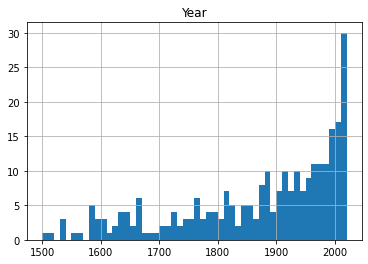

In [49]:
df['Year'] = df['Year'].dropna().astype(int)
bins_list = range(1500,2022,10) #bins for 10 years
histogram1 = df.hist(column='Year',bins=bins_list)
plt.show()

*4. Does the Max Plume Heigt or Fatalities number correlate with the eruptions strength (VEI)?*

Correlation between VEI and Fatalities number:

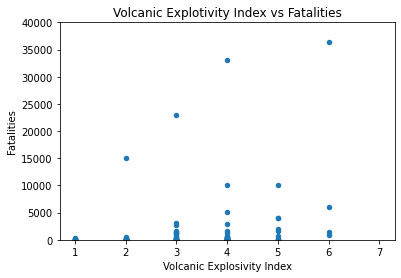

In [50]:
graph1 = df2.plot.scatter(x = 'Volcanic Explosivity Index', y='Fatalities')
graph1.set_ylabel('Fatalities')
graph1.set_xlabel('Volcanic Explosivity Index')
graph1.set_ylim(0, 40000)
graph1.set_title('Volcanic Explotivity Index vs Fatalities')
graph1.legend = True
plt.show()

Correlation between VEI and Max Plume Height:


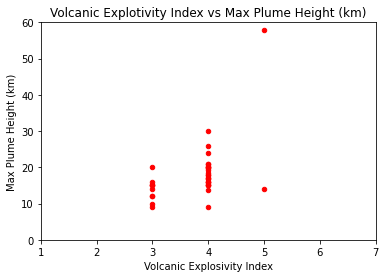

In [51]:
graph2 = df.plot(kind='scatter', x = 'Volcanic Explosivity Index', y='Max Plume Height (km)', color='r')
graph2.set_ylabel('Max Plume Height (km)')
graph2.set_xlabel('Volcanic Explosivity Index')
graph2.set_title('Volcanic Explotivity Index vs Max Plume Height (km)')
graph2.set_ylim(0, 60)
graph2.set_xticks([1,2,3,4,5,6,7])
plt.show()

*5. Creating a world map with volcanoes:*


In [52]:
world_map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres")) #importing world map
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


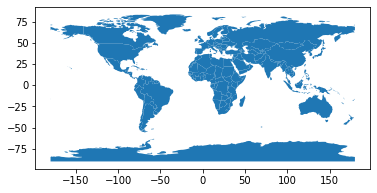

In [53]:
world_map.plot()
plt.show()

Importing file with volcanoes latitute and longitute:


In [54]:
location = pd.read_excel('/content/drive/My Drive/Colab Notebooks/volcanoes_long_lat.xlsx')
location.head()

,Volcano Name,Country,Type,Latitude (dd),Longitude (dd),Elevation (m)
0,Abu,Japan,Shield,34.50,131.60,641.0
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0
4,Adams,United States,Stratovolcano,46.21,-121.49,3742.0


Renaming columns with Latitude, Longitude and Elevation:

In [55]:
location = location.rename(columns={'Latitude (dd)':'Lat', 'Longitude (dd)':'Long', 'Elevation (m)':'Elevation'})

Removing column that I am not going to use

In [56]:
location = location.drop(labels=['Country'], axis=1)

Removing NAN:

In [57]:
location = location.dropna(how='any')
location.head()

,Volcano Name,Type,Lat,Long,Elevation
0,Abu,Shield,34.50,131.60,641.0
1,Acamarachi,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Caldera,38.57,34.52,1689.0
4,Adams,Stratovolcano,46.21,-121.49,3742.0


Removing duplicates:

In [58]:
location.drop_duplicates()

,Volcano Name,Type,Lat,Long,Elevation
0,Abu,Shield,34.50,131.60,641.0
1,Acamarachi,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Caldera,38.57,34.52,1689.0
4,Adams,Stratovolcano,46.21,-121.49,3742.0
...,...,...,...,...,...
426,Yantarni,Stratovolcano,57.02,-157.19,1345.0
427,Yasur,Stratovolcano,-19.53,169.44,361.0
428,Yellowstone,Caldera,44.43,-110.67,2805.0
429,Zavaritzki Caldera,Caldera,46.93,151.95,624.0


Changing the format of Latitude and Longitude into float:

In [59]:
location


,Volcano Name,Type,Lat,Long,Elevation
0,Abu,Shield,34.50,131.60,641.0
1,Acamarachi,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Caldera,38.57,34.52,1689.0
4,Adams,Stratovolcano,46.21,-121.49,3742.0
...,...,...,...,...,...
426,Yantarni,Stratovolcano,57.02,-157.19,1345.0
427,Yasur,Stratovolcano,-19.53,169.44,361.0
428,Yellowstone,Caldera,44.43,-110.67,2805.0
429,Zavaritzki Caldera,Caldera,46.93,151.95,624.0


In [60]:
location.dtypes

Volcano Name     object
Type             object
Lat             float64
Long            float64
Elevation       float64
dtype: object

Creating new column with geometry based on the lat nad long:

In [61]:
geometry = [Point(xy) for xy in zip(location['Long'], location['Lat'])]
print(geometry[1:5])

[<shapely.geometry.point.Point object at 0x7efdb6cbe050>, <shapely.geometry.point.Point object at 0x7efdb6cbe350>, <shapely.geometry.point.Point object at 0x7efdb6cbee90>, <shapely.geometry.point.Point object at 0x7efdb6c87550>]


Creating a geodataframe based on the geometry list:

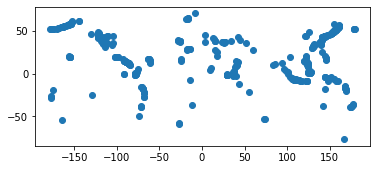

In [62]:
vol_loc = geopandas.GeoDataFrame(location, geometry=geometry, crs = 3857)
vol_loc.plot()
plt.show()

Plotting volcanoes by height on the world map:


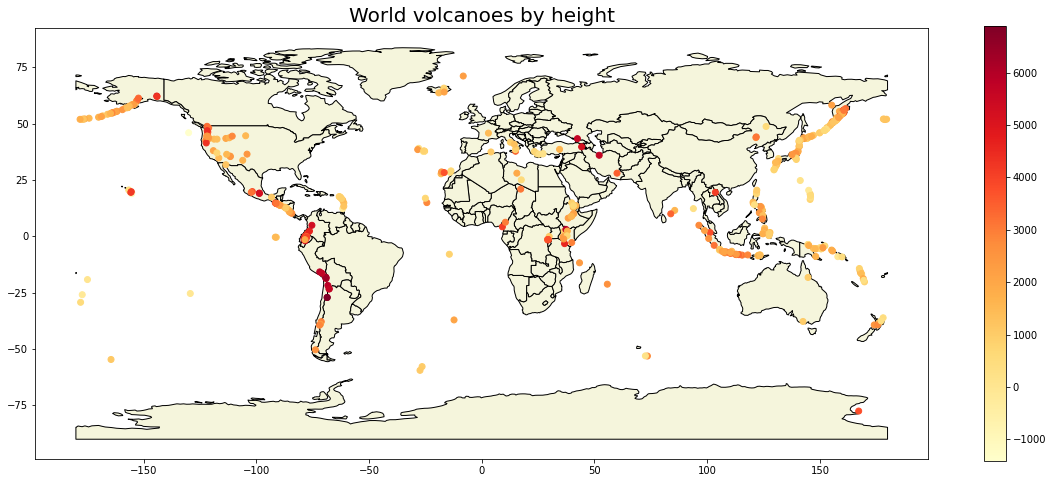

In [63]:
fig, ax = plt.subplots(figsize = (20,50))
world_map.plot(ax = ax, color = 'beige', edgecolor = 'black')
vol_loc.plot(ax = ax, column='Elevation', cmap = 'YlOrRd', legend = True, legend_kwds={"shrink":.16})
ax.set_title('World volcanoes by height', fontdict = {'fontsize':'20', 'fontweight':'10'})

plt.show()

Plotting volcanoes by type on the world map:

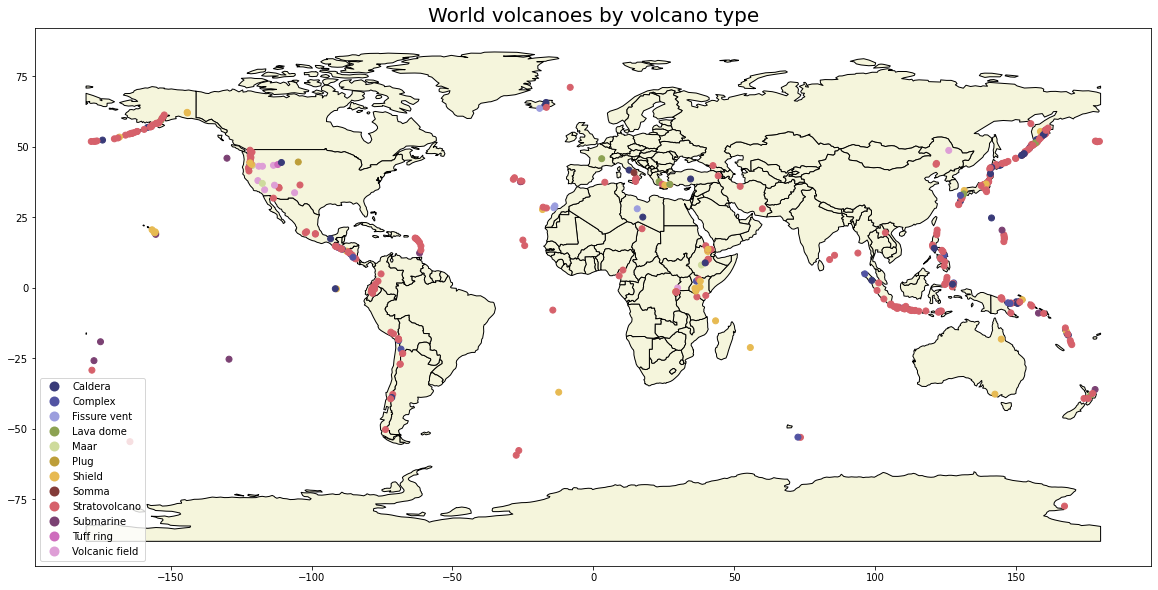

In [64]:
fig, ax = plt.subplots(figsize = (20,50))
world_map.plot(ax = ax, color = 'beige', edgecolor = 'black')
vol_loc.plot(ax = ax, column='Type', cmap = 'tab20b', legend = True)
ax.set_title('World volcanoes by volcano type', fontdict = {'fontsize':'20', 'fontweight':'10'})
plt.show()